In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Point, Polygon

# Reading two relevant dataframes with arrondisement and quartier (subdivision) data

In [11]:
df = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/quartierreferencehabitation.geojson') # quartier and arrondisement data
df2 = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/quartiers_sociologiques_2014.geojson') # quartier data

# Saving centroids for arrondissements / districts

In [12]:
# df = df.to_crs(crs=3857)
# district_centroids = df.copy()
# district_centroids['centroid'] = district_centroids['geometry'].centroid
# df = df.to_crs(crs=4326)
# district_centroids = district_centroids.groupby('no_arr').agg(
#     nom_qr=('nom_qr', 'first'),
#     nom_arr=('nom_arr', 'first'),
#     nom_mun=('nom_mun', 'first'),
#     geometry=('geometry', 'first'),
#     centroid=('centroid', 'first')
# ).reset_index()

In [13]:
# district_centroids = district_centroids.drop(columns=['geometry'])
# district_centroids = gpd.GeoDataFrame(district_centroids, geometry='centroid')

In [14]:
# district_polygons = df.copy()
# district_polygons = district_polygons.groupby('no_arr').agg(
#     nom_qr=('nom_qr', 'first'),
#     nom_arr=('nom_arr', 'first'),
#     nom_mun=('nom_mun', 'first'),
#     geometry=('geometry', 'first')
# ).reset_index()

# district_polygons = gpd.GeoDataFrame(district_polygons, geometry='geometry')

In [15]:
df2 = df2.to_crs(crs=4326)
district_centroids_2 = df2.copy()
district_centroids_2['centroid'] = district_centroids_2['geometry'].centroid
df2 = df2.to_crs(crs=4326)
district_centroids_2 = district_centroids_2.groupby('Abreviation').agg(
    arrondissement=('Arrondissement', 'first'),
    id=('id', 'first'),
    centroid=('centroid', 'first')
).reset_index()

district_centroids_2 = gpd.GeoDataFrame(district_centroids_2, geometry='centroid')

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_18995/3480392284.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_centroids_2['centroid'] = district_centroids_2['geometry'].centroid


In [16]:
district_centroids_2.head()

,Abreviation,arrondissement,id,centroid
0,AHU,Ahuntsic-Cartierville,1,POINT (-73.65611 45.55558)
1,AJ,Anjou,3,POINT (-73.56535 45.61250)
2,CDN,Côte-des-Neiges–Notre-Dame-de-Grâce,4,POINT (-73.63355 45.49662)
3,CND,Côte-des-Neiges–Notre-Dame-de-Grâce,5,POINT (-73.62917 45.46759)
4,IBI / PRF,L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Ro...,6,POINT (-73.87869 45.48677)


In [17]:
district_centroids_2.to_file("district_centroids.geojson", driver='GeoJSON')

In [146]:
unique_arrondissements = df2.groupby('Arrondissement')['geometry'].apply(lambda x: x.unary_union)
unique_arrondissements_gdf = gpd.GeoDataFrame({'Arrondissement': unique_arrondissements.index, 'geometry': unique_arrondissements.values}).reset_index(drop=True)

In [149]:
unique_arrondissements_gdf.to_file("district_polygons.geojson", driver='GeoJSON')

In [19]:
polygons = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/district_polygons.geojson')

# Inspecting dfs

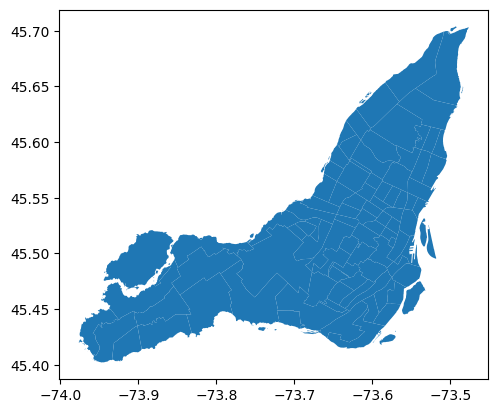

In [104]:
df.plot();

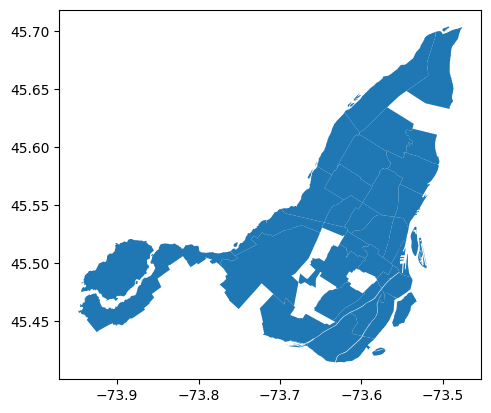

In [103]:
df2.plot();

## Quartiers by ID

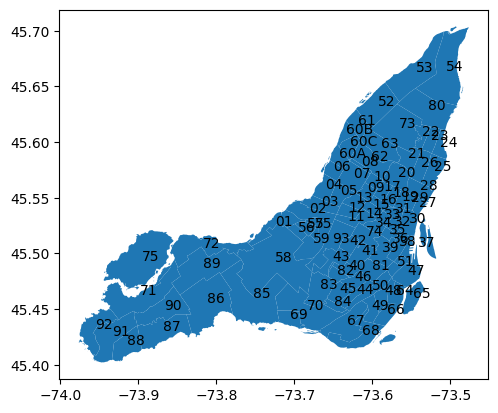

In [6]:
ax = df.plot()
for idx, row in df.iterrows():
    ax.annotate(text=row['no_qr'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

## Arrondisement by ID

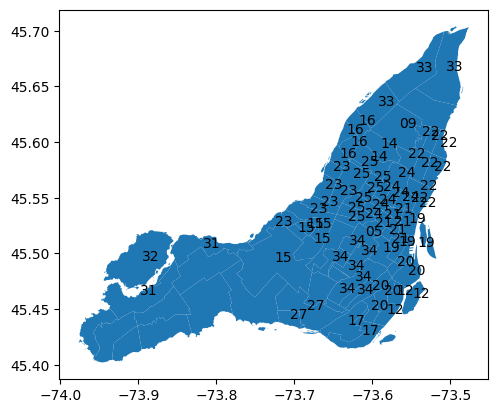

In [7]:
ax = df.plot()
for idx, row in df.iterrows():
    ax.annotate(text=row['no_arr'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

## Arrondisement by name (abreviation)

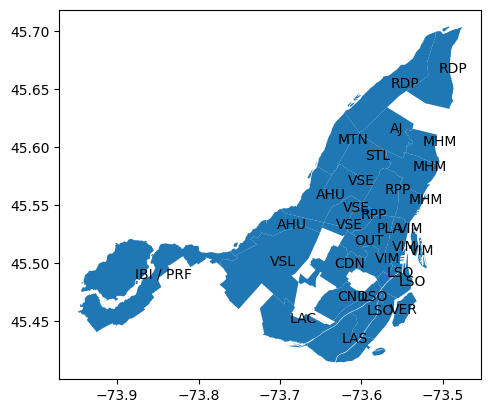

In [8]:
ax = df2.plot()
for idx, row in df2.iterrows():
    ax.annotate(text=row['Abreviation'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

# Further analysis of df1

In [9]:
df.head(2)

,no_qr,nom_qr,no_arr,nom_arr,nom_mun,geometry
0,53,Rivière-des-Prairies,33,Rivière-des-Prairies–Pointe-aux-Trembles,Montréal,"MULTIPOLYGON (((-73.54471 45.64824, -73.54516 ..."
1,24,Beaurivage,22,Mercier–Hochelaga-Maisonneuve,Montréal,"MULTIPOLYGON (((-73.52395 45.58975, -73.52400 ..."


In [11]:
df['no_qr'].describe() # unique quartiers = 91

count     91
unique    91
top       53
freq       1
Name: no_qr, dtype: object

In [12]:
df['no_arr'].describe() # unique arrondisements = 19

count     77
unique    19
top       22
freq       9
Name: no_arr, dtype: object

In [13]:
# quartier data
qr_counts = df['nom_qr'].value_counts()
num_unique_qrs = len(qr_counts)
unique_qrs = df['nom_qr'].unique()

# arrondisement data
arr_counts = df['nom_arr'].value_counts()
num_unique_arrs = len(arr_counts)
unique_arrs = df['nom_arr'].unique()

# geo data
geo_counts = df['geometry'].value_counts()
num_unique_geo = len(geo_counts)

In [14]:
print('Number of unique geometries present in the dataframe, correspoding to the quartiers: ', num_unique_geo)

Number of unique geometries present in the dataframe, correspoding to the quartiers:  91


In [15]:

print("Number of unique quartiers:", num_unique_qrs)


Number of unique quartiers: 91


In [16]:

print("Unique quartiers names:", unique_qrs)

Unique quartiers names: ['Rivière-des-Prairies' 'Beaurivage' 'Tétreaultville' 'Dupéré' 'Guybourg'
 'Longue-Pointe' 'Louis-Riel' 'Marie-Victorin' 'Maisonneuve' 'René-Goupil'
 'Sainte-Lucie' 'Sault-au-Récollet' 'Saint-Sulpice' 'Nicolas-Viel'
 'François-Perrault' 'Savane' 'Snowdon' 'Côte-Saint-Antoine' 'Ville-Émard'
 'Saint-Henri' 'Côte-Saint-Paul' 'Pointe-Saint-Charles' 'Petite-Bourgogne'
 'Montagne' 'René-Lévesque' 'Édouard-Montpetit' 'Parc-Kent' 'Hochelaga'
 'Sainte-Marie' 'Préfontaine' 'Petite-Côte' 'Vieux-Rosemont'
 'Étienne Desmarteaux' 'Louis-Hébert' 'Lorimier' 'Saint-Louis'
 'Parc-Lafontaine' 'Parc-Laurier' 'Mile End' 'Gabriel-Sagard'
 'Parc-Extension' 'Saint-Édouard' 'Parc-Jarry' 'Crémazie' 'Père-Marquette'
 'Pointe-aux-Trembles' 'Marc-Aurèle-Fortin' 'Vieux-Montréal' 'Loyola'
 'Upper Lachine' 'La Visitation' 'Nouveau-Bordeaux' 'Cartierville' 'Anjou'
 'Outremont' 'Chameran/Montpellier' 'Grenet' 'Dutrisac' 'Bois-Francs'
 'Est' 'Centre' 'Grande-Prairie' 'Port-Maurice' 'Desmarchais-C

In [17]:
print('Unique quartiers count:', qr_counts)

Unique quartiers count: Rivière-des-Prairies    1
Lachine-Ouest           1
Sault-Saint-Louis       1
Ile-des-Soeurs          1
Verdun-Centre           1
                       ..
Sainte-Marie            1
Hochelaga               1
Parc-Kent               1
Édouard-Montpetit       1
Centre-Nord             1
Name: nom_qr, Length: 91, dtype: int64


In [18]:
print("Number of unique arrondisements:", num_unique_arrs) # 19 arrondisements total, and a None value

Number of unique arrondisements: 19


In [19]:
print("Unique arrondisements names:", unique_arrs) # there is a None - this might happen because some quartiers do not have any arrondisement assigned

Unique arrondisements names: ['Rivière-des-Prairies–Pointe-aux-Trembles'
 'Mercier–Hochelaga-Maisonneuve' 'Rosemont–La Petite-Patrie'
 'Villeray–Saint-Michel–Parc-Extension' 'Ahuntsic-Cartierville'
 'Côte-des-Neiges–Notre-Dame-de-Grâce' 'Le Sud-Ouest' 'Ville-Marie'
 'Le Plateau-Mont-Royal' 'Anjou' 'Outremont' 'Saint-Laurent'
 'Montréal-Nord' 'Saint-Léonard' 'Verdun' 'LaSalle' 'Lachine'
 'Pierrefonds-Roxboro' None "L'Île-Bizard–Sainte-Geneviève"]


In [20]:
print('Unique arrondisements count:', arr_counts)

Unique arrondisements count: Mercier–Hochelaga-Maisonneuve               9
Rosemont–La Petite-Patrie                   7
Villeray–Saint-Michel–Parc-Extension        7
Côte-des-Neiges–Notre-Dame-de-Grâce         7
Ahuntsic-Cartierville                       6
Le Plateau-Mont-Royal                       6
Le Sud-Ouest                                5
Saint-Laurent                               5
Ville-Marie                                 4
Montréal-Nord                               4
Rivière-des-Prairies–Pointe-aux-Trembles    3
Verdun                                      3
Lachine                                     2
Pierrefonds-Roxboro                         2
Saint-Léonard                               2
LaSalle                                     2
Anjou                                       1
Outremont                                   1
L'Île-Bizard–Sainte-Geneviève               1
Name: nom_arr, dtype: int64


In [25]:
rows_with_none = df[df['nom_arr'].isnull()] # analyzing None values - here we can see that some quartiers do not have an arrondisement assigned 
rows_with_none

,no_qr,nom_qr,no_arr,nom_arr,nom_mun,geometry
72,80,Montréal-Est,None,None,Montréal-Est,"MULTIPOLYGON (((-73.49195 45.63287, -73.49192 ..."
73,81,Westmount,None,None,Westmount,"MULTIPOLYGON (((-73.58065 45.48558, -73.58065 ..."
74,82,Hampstead,None,None,Hampstead,"MULTIPOLYGON (((-73.63195 45.48038, -73.63195 ..."
75,83,Côte-Saint-Luc,None,None,Côte-Saint-Luc,"MULTIPOLYGON (((-73.66314 45.48088, -73.66186 ..."
76,84,Montréal-Ouest,None,None,Montréal-Ouest,"MULTIPOLYGON (((-73.63265 45.44974, -73.63203 ..."
77,85,Dorval,None,None,Dorval,"MULTIPOLYGON (((-73.71162 45.47065, -73.71252 ..."
78,86,Pointe-Claire,None,None,Pointe-Claire,"MULTIPOLYGON (((-73.79469 45.48182, -73.79015 ..."
79,87,Beaconsfield,None,None,Beaconsfield,"MULTIPOLYGON (((-73.83828 45.44540, -73.83537 ..."
80,90,Kirkland,None,None,Kirkland,"MULTIPOLYGON (((-73.90436 45.44679, -73.90238 ..."
81,89,Dollard-Des Ormeaux,None,None,Dollard-Des Ormeaux,"MULTIPOLYGON (((-73.77800 45.50095, -73.77799 ..."


# Further analysis of df2

In [40]:
df2.head()

,id,Q_sociologique,Arrondissement,Abreviation,nbr_RUI,Table,geometry
0,1,Ahuntsic,Ahuntsic-Cartierville,AHU,0,Solidarité Ahuntsic,"MULTIPOLYGON (((-73.69831 45.54688, -73.69813 ..."
1,2,Bordeaux-Cartierville,Ahuntsic-Cartierville,AHU,1,Conseil local des intervenants communautaires ...,"MULTIPOLYGON (((-73.69831 45.54688, -73.69827 ..."
2,3,Anjou,Anjou,AJ,0,Regroupement des organismes communautaires et ...,"MULTIPOLYGON (((-73.60235 45.61259, -73.60142 ..."
3,4,Côte-des-Neiges,Côte-des-Neiges–Notre-Dame-de-Grâce,CDN,0,Corporation de développement communautaire de ...,"MULTIPOLYGON (((-73.67721 45.48369, -73.67628 ..."
4,5,Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,CND,0,Conseil communautaire de Notre-Dame-de-Grâce,"MULTIPOLYGON (((-73.62992 45.47836, -73.62950 ..."


In [43]:
arr2_counts = df2['Arrondissement'].value_counts()
num_unique_arrs2 = len(arr2_counts)
unique_arr2 = df2['Arrondissement'].unique()

In [45]:
arr2_counts

Ville-Marie                                            4
Le Sud-Ouest                                           4
Villeray–Saint-Michel–Parc-Extension                   3
Mercier–Hochelaga-Maisonneuve                          3
Rosemont–La Petite-Patrie                              2
Rivière-des-Prairies–Pointe-aux-Trembles               2
Ahuntsic-Cartierville                                  2
Côte-des-Neiges–Notre-Dame-de-Grâce                    2
Montréal-Nord                                          1
Outremont                                              1
Anjou                                                  1
LaSalle                                                1
Lachine                                                1
Saint-Laurent                                          1
Saint-Léonard                                          1
L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro    1
Verdun                                                 1
Le Plateau-Mont-Royal          

In [46]:
num_unique_arrs2

18

In [47]:
unique_arr2

array(['Ahuntsic-Cartierville', 'Anjou',
       'Côte-des-Neiges–Notre-Dame-de-Grâce',
       "L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro", 'Lachine',
       'LaSalle', 'Mercier–Hochelaga-Maisonneuve', 'Montréal-Nord',
       'Outremont', 'Le Plateau-Mont-Royal',
       'Rivière-des-Prairies–Pointe-aux-Trembles',
       'Rosemont–La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard',
       'Le Sud-Ouest', 'Verdun', 'Ville-Marie',
       'Villeray–Saint-Michel–Parc-Extension'], dtype=object)

# Calculating centroids

In [24]:
df["centroid"] = df["geometry"].centroid # review if this is the correct way of calculating centroids
df2["centroid"] = df2["geometry"].centroid # review if this is the correct way of calculating centroids

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_34877/2247896962.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df2["centroid"] = df2["geometry"].centroid # review if this is the correct way of calculating centroids


/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_34877/2593072443.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df.centroid.plot();


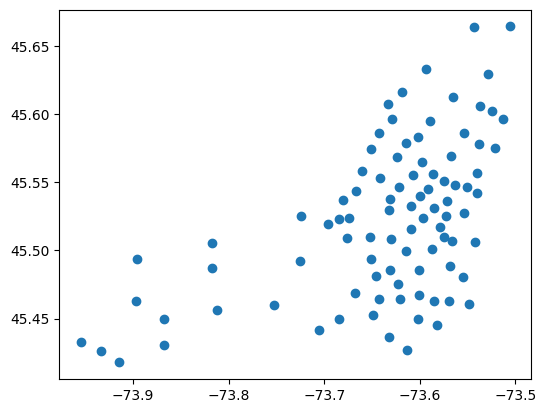

In [23]:
df.centroid.plot();

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_34877/4133853201.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df2.centroid.plot();


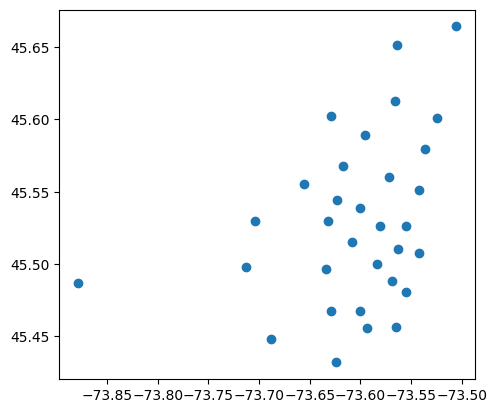

In [25]:
df2.centroid.plot();